In [253]:
import math
from matplotlib import pyplot as plt
import itertools
import numpy as np
from perlin_noise import PerlinNoise
from scipy.signal import convolve2d
from scipy.spatial import Voronoi, voronoi_plot_2d

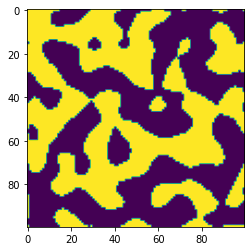

In [2]:
noise = PerlinNoise(octaves = 7)

N = 100
x = np.array([noise([float(i), float(j)]) for i in np.linspace(0,1,N) for j in np.linspace(0,1,N)]).reshape(N,N)
plt.imshow(x//1)

.............................................................

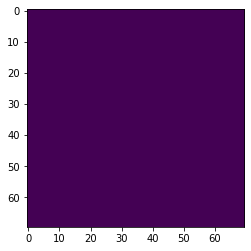

In [213]:
%matplotlib inline 
from matplotlib import animation
from IPython.display import HTML

LENGTH = 1
RES = 50 
PADDING = 10 
DIMSIZE = RES

normal_hist = lambda n,r: np.histogram(np.random.normal(10,1,n),bins=r)[0]

rhist = normal_hist(10000, RES) 
rhist = np.concatenate([np.zeros(PADDING), rhist, np.zeros(PADDING)])
DIMSIZE = RES + (PADDING*2)
mat = np.outer(rhist,rhist)
cb = np.outer(rhist,mat).reshape(DIMSIZE,DIMSIZE,DIMSIZE)

fig,ax = plt.subplots()
im = ax.imshow(cb[:,:,PADDING])

def frame(i: int):
    cube_slice = cb[:,:,i+1+PADDING]
    print(".", end = "")
    im.set_data(cube_slice)
    return im,

anim = animation.FuncAnimation(fig,frame,frames=DIMSIZE-1-PADDING,blit = True)
HTML(anim.to_jshtml())

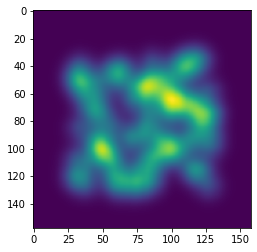

In [30]:
n = 100*100 
p = 0.01
#x = (np.sin(np.linspace(-np.pi/2,np.pi+(np.pi/2),20))+1)*.5

data = np.random.choice([0,1],n,p=[1-p, p]).reshape((int(math.sqrt(n)), int(math.sqrt(n))))

rhist = normal_hist(10000,10) * 8
rhist = rhist / rhist.max()

mat = np.outer(rhist,rhist)
cub = np.outer(mat,mat)

data = convolve2d(data,np.outer(rhist,rhist))
data = data / data.max()

rhist = normal_hist(10000,50) * 0.01
rhist = rhist / rhist.max()
data = convolve2d(data,np.outer(rhist,rhist))
data = data / data.max()



plt.imshow(data)

[[0.95 0.04 0.01 0.  ]
 [0.2  0.6  0.2  0.  ]
 [0.1  0.2  0.6  0.1 ]
 [0.   0.1  0.5  0.4 ]]


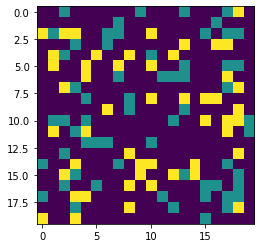

In [412]:

def normalize(mat, axis = 0):
    return mat / mat.sum(axis=axis)

def chain(transition_matrix, shape = (10,10), homogenization_factor: float = .1):
    assert transition_matrix.shape[0] == transition_matrix.shape[1]
    n_states = transition_matrix.shape[0]
    
    current = 0 
    
    states = np.linspace(0, n_states-1, n_states, dtype=int)
    
    base_tm = normalize(transition_matrix,axis=1)
    print(base_tm)
    
    board = np.zeros(shape, dtype = int)
    cells = board.ravel()
    
    while True:
        for idx, current in enumerate(cells):
            current_p = base_tm[current, :]
            cells[idx] = np.random.choice(states, p = current_p)
        yield board
        
p_matrix = np.array([
    [0.95, 0.04, 0.01 ,0.0 ],
    [0.2 , 0.6 , 0.2  ,0.0 ],
    [0.1 , 0.2 , 0.6  ,0.1 ],
    [0.0 , 0.1 , 0.5  ,0.4 ],
])

fig,ax = plt.subplots()
c = chain(p_matrix, shape=(20,20))
im = ax.imshow(next(c))
def frame(i: int):
    im.set_data(next(c))
    return im,

anim = animation.FuncAnimation(fig,frame,frames=100, blit = True)
HTML(anim.to_jshtml())
